1. Importing the required libraries for EDA

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline
sns.set(color_codes=True)
from google.colab import files
import os

2. Loading the data into the data frame.

In [41]:
df = pd.read_csv("/content/sample_data/data.csv")
# To display the top 5 rows
df.head(5)


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [42]:
df.tail(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


3. Checking the types of data

In [43]:
df.dtypes

,0
Make,object
Model,object
Year,int64
Engine Fuel Type,object
Engine HP,float64
Engine Cylinders,float64
Transmission Type,object
Driven_Wheels,object
Number of Doors,float64
Market Category,object


4. the columns that are irrelevant or hard to use at this stage


<Axes: >

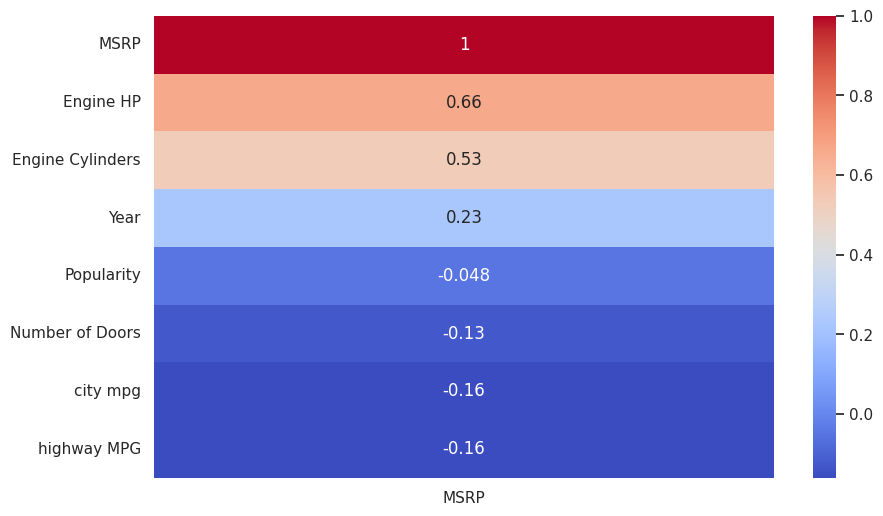

In [44]:
numeric_cols = df.select_dtypes(include=['int64', 'float64'])
correlation = numeric_cols.corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlation[['MSRP']].sort_values(by='MSRP', ascending=False), annot=True, cmap='coolwarm')


5. Dropping irrelevant columns

In [45]:
# List of columns we wanted to drop
columns_to_drop = [
   'Engine Fuel Type',
   'Market Category',
   'Vehicle Style',
   'Popularity',
   'Number of Doors',
   'Vehicle Size'
]

# Filter the list to only include columns that actually exist
columns_to_drop = [col for col in columns_to_drop if col in df.columns]

# Drop them safely
df.drop(columns=columns_to_drop, axis=1, inplace=True)

# Show final column list
print("Remaining columns:", df.columns.tolist())
df.head()




Remaining columns: ['Make', 'Model', 'Year', 'Engine HP', 'Engine Cylinders', 'Transmission Type', 'Driven_Wheels', 'highway MPG', 'city mpg', 'MSRP']


,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


## 5. Renaming the columns

In [46]:
df = df.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price" })
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


6. Dropping the duplicate rows

In [47]:
df.shape

(11914, 10)

In [48]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (989, 10)


In [49]:
df.count()      # Used to count the number of rows

,0
Make,11914
Model,11914
Year,11914
HP,11845
Cylinders,11884
Transmission,11914
Drive Mode,11914
MPG-H,11914
MPG-C,11914
Price,11914


In [50]:
df = df.drop_duplicates()
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [51]:
df.count()

,0
Make,10925
Model,10925
Year,10925
HP,10856
Cylinders,10895
Transmission,10925
Drive Mode,10925
MPG-H,10925
MPG-C,10925
Price,10925


7. Dropping the missing or null values.

In [52]:
print(df.isnull().sum())

Make             0
Model            0
Year             0
HP              69
Cylinders       30
Transmission     0
Drive Mode       0
MPG-H            0
MPG-C            0
Price            0
dtype: int64


In [53]:
df = df.dropna()    # Dropping the missing values.
df.count()

,0
Make,10827
Model,10827
Year,10827
HP,10827
Cylinders,10827
Transmission,10827
Drive Mode,10827
MPG-H,10827
MPG-C,10827
Price,10827


In [54]:
print(df.isnull().sum())   # After dropping the values

Make            0
Model           0
Year            0
HP              0
Cylinders       0
Transmission    0
Drive Mode      0
MPG-H           0
MPG-C           0
Price           0
dtype: int64


## 8. Detecting Outliers

<Axes: xlabel='Price'>

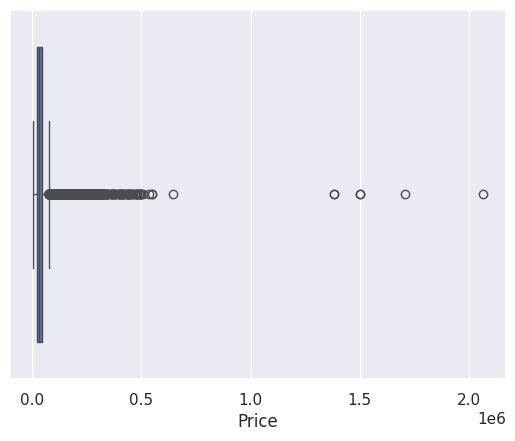

In [55]:
sns.boxplot(x=df['Price'])

<Axes: xlabel='HP'>

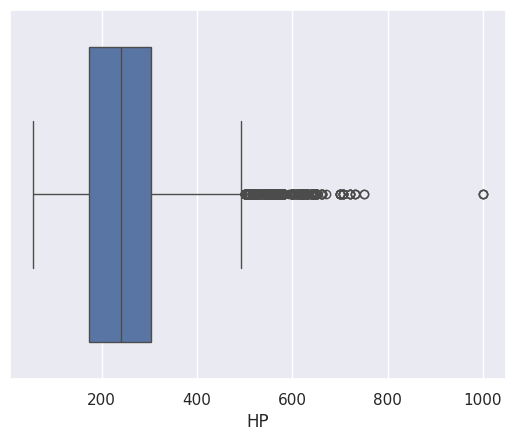

In [56]:
sns.boxplot(x=df['HP'])

<Axes: xlabel='Cylinders'>

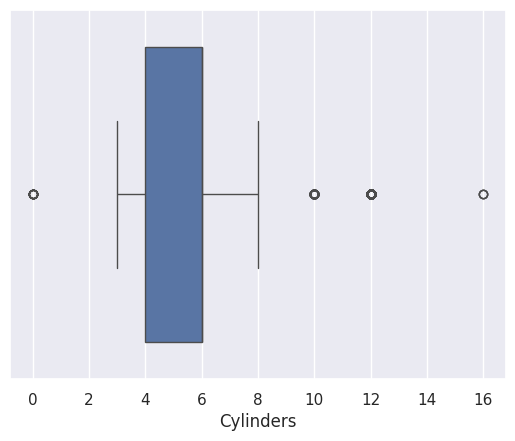

In [57]:
sns.boxplot(x=df['Cylinders'])

In [62]:
# Select only numeric columns
numeric_cols_for_outliers = df.select_dtypes(include=np.number)

Q1 = numeric_cols_for_outliers.quantile(0.25)
Q3 = numeric_cols_for_outliers.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year             9.0
HP             130.0
Cylinders        2.0
MPG-H            8.0
MPG-C            6.0
Price        21327.5
dtype: float64


In [63]:
# Calculate the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a boolean mask for outliers in numeric columns
outlier_mask = ((numeric_cols_for_outliers < lower_bound) | (numeric_cols_for_outliers > upper_bound)).any(axis=1)

# Filter the original DataFrame using the outlier mask
df = df[~outlier_mask]

df.shape

(9191, 10)

## 9. Plot different features against one another (scatter), against frequency (histogram)

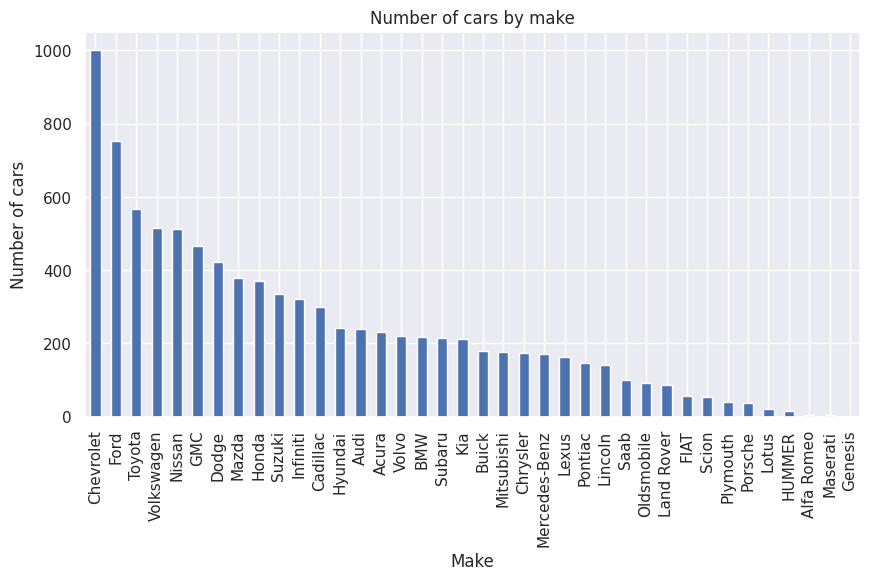

In [64]:
df.Make.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of cars by make")
plt.ylabel('Number of cars')
plt.xlabel('Make');

### Heat Maps

,Year,HP,Cylinders,MPG-H,MPG-C,Price
Year,1.000000,0.326726,-0.133920,0.378479,0.338145,0.592983
HP,0.326726,1.000000,0.715237,-0.443807,-0.544551,0.739042
Cylinders,-0.133920,0.715237,1.000000,-0.703856,-0.755540,0.354013
MPG-H,0.378479,-0.443807,-0.703856,1.000000,0.939141,-0.106320
MPG-C,0.338145,-0.544551,-0.755540,0.939141,1.000000,-0.180515
Price,0.592983,0.739042,0.354013,-0.106320,-0.180515,1.000000


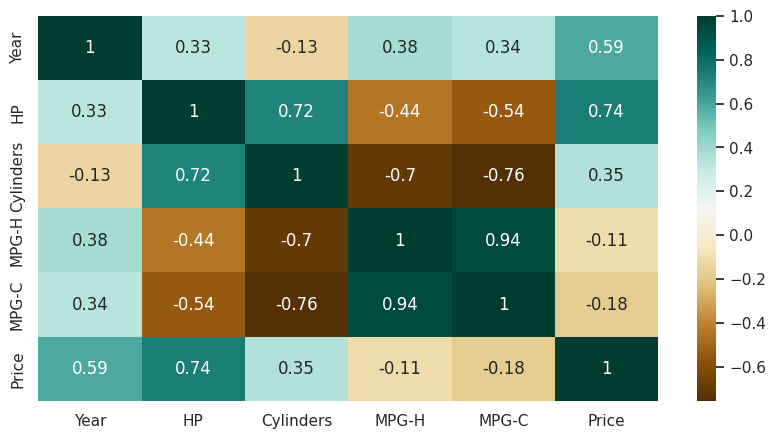

In [67]:
plt.figure(figsize=(10,5))
numeric_df = df.select_dtypes(include=np.number)      # Select only numeric columns
c = numeric_df.corr()                                 # Calculate correlation on numeric columns
sns.heatmap(c,cmap="BrBG",annot=True)
c

### Scatterplot


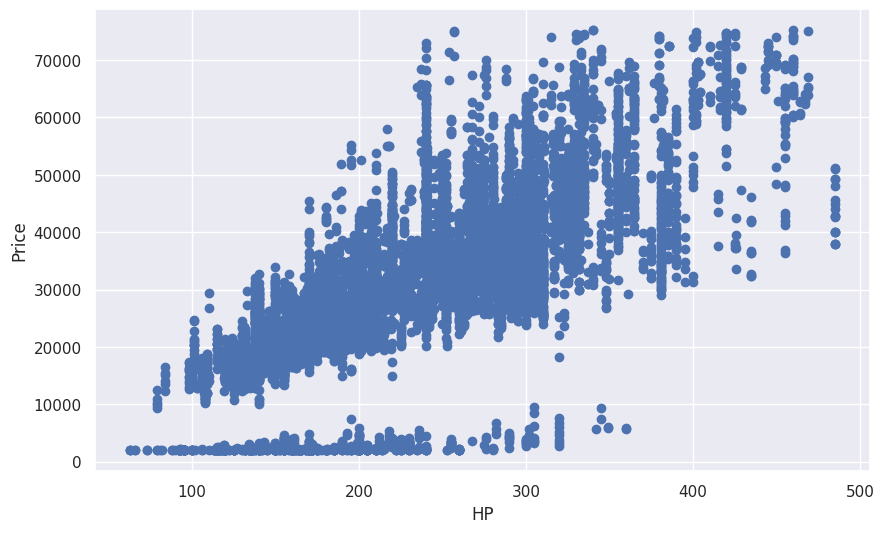

In [68]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['HP'], df['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()

In [71]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# فرض: df دیتافریم اصلی شماست که این ستون‌ها رو داره
# اگر اسماش فرق دارن، فقط اسم ستون‌ها رو تنظیم کن

# 1. Features and target
X = df[['Year', 'HP', 'Cylinders', 'MPG-H', 'MPG-C']]  # ویژگی‌ها
y = df['Price']  # هدف

# 2. Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Predict on test set
y_pred = model.predict(X_test)

# 5. Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")



Mean Absolute Error (MAE): 6444.94
Root Mean Squared Error (RMSE): 8434.29


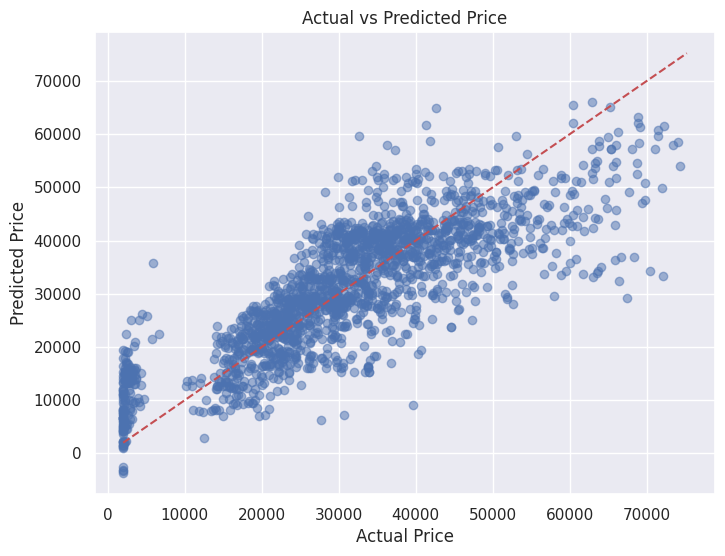

In [72]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # خط ایده‌آل y=x
plt.grid(True)
plt.show()


In [73]:
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

coeff_df.sort_values(by='Coefficient', ascending=False, inplace=True)
print(coeff_df)


     Feature  Coefficient
0       Year   850.654895
4      MPG-C   232.994482
1         HP   136.823174
3      MPG-H  -155.240356
2  Cylinders  -973.157618


In [74]:
import joblib

# Save the trained model
joblib.dump(model, 'car_price_model.pkl')
print("✅ Model saved successfully as 'car_price_model.pkl'")


✅ Model saved successfully as 'car_price_model.pkl'


In [75]:
mean_price = y_test.mean()
print(f"Average actual price: ${mean_price:.2f}")

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE (% of avg price): {mae / mean_price * 100:.2f}%")
print(f"RMSE (% of avg price): {rmse / mean_price * 100:.2f}%")


Average actual price: $31034.68
MAE (% of avg price): 20.77%
RMSE (% of avg price): 27.18%
